<a href="https://colab.research.google.com/github/muralianamalatibco/pythonlearning/blob/main/Product_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom, expon
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import power

In [ ]:
p = 1 - binom.cdf(k=6, n=10, p=0.5)

In [ ]:
alpha =0.5
if alpha < p:
  print("Reject H0")
else:
  print("Fail to reject H0")

Fail to reject H0


Point estmate +- margin error
Example: Marketing example
firm A:
  worked on 50 stores
  sold an avg 1850 bottles

Significance level (alpha) (Threshold value) = 0.01
confidence level (1 - alpha) = 0.99 or 99%

**Suppose there is a Retail Store Chain that sells Shampoo bottles**

This chain has 2000 stores across India.
The parameters for weekly sales of the shampoo bottle were reported as:
Mean: 1800
Standard deviation: 100
This was calculated by analyzing a lot of historical data

Firm A:
  50 stores
  avg 1850

Firm B:
  5 stores
  avg 1900

alpha = 0.01 (Significance level)


In [ ]:
'''
H0 - Null Hypothesis - mu =1800
Ha - Alternate Hypothesis - mu > 1800
'''

In [ ]:
'''
Distribution - Gaussian
mu =1800
sigma = 100/sqrt(50)
'''
mu = 1800
sigma = 100/np.sqrt(50)

mu_m = 1850

z_score = (mu_m - mu)/sigma
print(z_score)

3.5355339059327378


In [ ]:
1- norm.cdf(z_score), 1- norm.isf(z_score)

(0.00020347600872250293, nan)

In [ ]:
'''
Firm B
Ho - mu = 1800
Ha - mu > 1850
n = 5 stores

'''
mu = 1800
sigma = 100/np.sqrt(5)

mu_m = 1900

alpha = 0.01

z = (mu_m - mu)/sigma
p = 1- norm.cdf(z)
p

0.0126736593387341

In [ ]:
if p < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

Fail to reject H0


 **CRITCAL VALUE**

 What should be the minimum weekly avg sales for the 50 stores under firm A, to convince us that their marketing had a positive effect with a confidence level of 99%



In [ ]:
mu = 1800
sigma = 100/np.sqrt(50)
min_weekly_avg_sales = mu + norm.isf(0.01) * sigma
min_weekly_avg_sales, mu + norm.ppf(0.99) * sigma


(1832.8995271426638, 1832.8995271426638)

In [ ]:
from functools import singledispatchmethod
# Firm B
mu = 1800
sigma = 100/np.sqrt(5)

min_weekly_avg_sales_b = mu + norm.isf(0.01) * sigma
min_weekly_avg_sales_b, mu + norm.ppf(0.99) * sigma

(1904.0374397133487, 1904.0374397133487)

**CONFIDENCE INTERVAL**

A confidence interval is a range of values that provides an estimate of a population parameter, such as the population mean, with a specified level of confidence

point estimate +- margin error

CI = Sample mean +- (Z * sigma/sqrt(n))


In [ ]:
# Firm A
pop_mean = 1800
sampe_mean = 1850
pop_stddv = 100
sample_size = 50
alpha = 0.01

z_critical = norm.ppf(1 - alpha)
margin_of_error =

In [ ]:
# Given data
population_mean = 1800
sample_mean = 1850
population_stddev = 100
sample_size = np.sqrt(50)
alpha = 0.01  # Significance level (1 - alpha will give us the confidence level)
# Calculate the critical value (Z) for a right-tailed test at the given alpha lev
z_critical = norm.ppf(1 - alpha)
# Calculate the margin of error
margin_of_error = z_critical * (population_stddev / sample_size)
# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence Interval:", confidence_interval)
# Check if the population mean (1800) falls within the confidence interval
if confidence_interval[0] <= population_mean <= confidence_interval[1]:
    print("The population mean falls within the confidence interval. Then we fail to reject null Hypothesis")
else:
    print("The population mean does not fall within the confidence interval. Then we reject null hypothesis")


Confidence Interval: (1817.1004728573362, 1882.8995271426638)
The population mean does not fall within the confidence interval. Then we reject null hypothesis


In [ ]:
# Firm B
population_mean = 1800
sample_mean = 1900
population_stddev = 100
sample_size = np.sqrt(5)
alpha = 0.01  # Significance level (1 - alpha will give us the confidence level)
# Calculate the critical value (Z) for a right-tailed test at the given alpha
z_critical = norm.ppf(1 - alpha)
# Calaculate the margin of error
margin_of_error = z_critical * (population_stddev / sample_size)
# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence Interval:", confidence_interval)

# Check if the population mean (1800) falls within the confidence interval

if (confidence_interval[0] <= population_mean <= confidence_interval[1]):
    print("The population mean falls within the confidence interval. Then we fail to reject null Hypothesis")
else:
    print("The population mean does not fall within the confidence interval. Then we reject null hypothesis")

Confidence Interval: (1795.9625602866513, 2004.0374397133487)
The population mean falls within the confidence interval. Then we fail to reject null Hypothesis


In [ ]:
# Chocolate factory problem
population_mean = 50
population_stddev = 2
sample_size = 30

sample_mean = 50
alpha = 0.05


In [ ]:
data = [55, 45, 52, 48, 55, 52, 52, 53, 48, 52, 53, 47, 54, 51, 52, 51, 48, 52, 53, 54, 51, 51, 52, 54, 47, 52, 53, 48, 51, 54]

# H0 -> mu = 50
# Ha -> mu not eq 50

alpha = 0.05
confidence_level = 1- (alpha/2)
sample_size = 30

z_critical = np.abs(round(norm.isf(alpha/2), 4))

sample_mean = np.mean(data)
sample_stddev = np.std(data)

# null hypothesis value
hypo_mean = 50

# calculate the effect size (diff between sample mean and hypothesized mean)
effect_size = (sample_mean - hypo_mean) / sample_stddev
print("Effect size:", effect_size)

# Use zt_ind_solve_power()
power = power.zt_ind_solve_power(effect_size = effect_size,
                                 nobs1 = sample_size,
                                 alpha = alpha,
                                 ratio = 0,
                                 alternative = 'two-sided')
print("Power:", power)


Effect size: 0.5261336417646574
Power: 0.8216812302268112


In [ ]:
p_avg = 65
p_std = 2.5
n = 20
s_avg = 64.5
alpha = 0.05

sig = 2.5 / np.sqrt(20)

z = (s_avg - p_avg) / sig
print(z)

p_val = norm.cdf(z)
print(p_val)

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

-0.8944271909999159
0.18554668476134878
Fail to reject H0


In [ ]:
pop_mean = 500
samp_mean = 530
sample_size = 70
pop_std = 125

cri_val = 1.64
alpha =0.05

z= (530-500)/(125/np.sqrt(70))
print(z)

2.007984063681781


In [ ]:
norm.isf(0.05)

1.6448536269514729

In [ ]:
p_avg = 1.7
p_std = 0.5
n = 30
samp_avg = 1.85
sig = 0.5/np.sqrt(30)

z = (samp_avg - p_avg)/sig
print(z)

1.6431676725155


In [ ]:
norm.ppf(1 - (1 - 0.96)/2) * 30 + 250

311.61246731895466

It is known that the mean IQ of high school students is 100, and the standard deviation is 15.

A coaching institute claims that candidates who study there have more IQ than an average high school student. When the IQ of 50 candidates was calculated, the average turned out to be 110

Conduct an appropriate hypothesis test to test the institute’s claim, with a significance level of 5%

In [ ]:
pop_mean = 100
pop_std = 15
n = 50
samp_mean = 110
alpha = 0.05

z = (samp_mean - pop_mean)/(pop_std/np.sqrt(n))
print(z)

p_val = 1 - norm.cdf(z)
print(p_val)

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

4.714045207910317
1.2142337364462463e-06
Reject H0


When smokers smoke, nicotine is transformed into cotinine, which can be tested.

The average cotinine level in a group of 50 smokers was 243.5 ng ml.

Assuming that the standard deviation is known to be 229.5 ng ml.

Test the assertion that the mean cotinine level of all smokers is equal to 300.0 ng ml, at 95% confidence.

In [ ]:
s_avg = 243.5
n = 50
s_std = 229.5
p_avg = 300
alpha = 0.05

sig = 229.5/np.sqrt(50)

z = (243.5 - 300)/sig
z

p_v = 2 * (1 - norm.cdf(abs(z)))
p_v, z

(0.08171731915149638, -1.7408075440976007)

In [ ]:
d = (750-800)/50
d

-1.0

In [ ]:
'''
The student hostel office at IIT Madras estimates that each student uses more than 3.5 buckets of water per day.

In order to verify this claim, the college trustees decide to monitor the water consuption over the next 45 days, and it is found that on an average, 3.72 buckets of water is consumed by a student, per day.

Assume that the population standard deviation is 0.7 buckets. What is the critical sample mean, assuming a critical z-value of 1.28?

Note: The critical sample mean is defined as the mean value for which the z-score is equal to the critical value. Also, round off the final answer to three decimal places.
'''
sample_size = 45
mean = 3.5
std = 0.7
critical_z = 1.28
critical_mean = mean + critical_z * (std / np.sqrt(sample_size))
print(f"The critical sample mean is {critical_mean:.3f}")

The critical sample mean is 3.634


In [ ]:
'''
The verbal reasoning in the GRE has an average score of 150 and a standard deviation of 8.5.

A coaching centre claims that their students are better. An average of 10 people showed that students from this coaching centre have an average score of 155.

At a 5% significance level (or 95% confidence level), can we conclude that students from the coaching centre are better? Use the Z-test, and compute the p-value.
'''

mean = 150
std = 8.5
n = 10
samp_mean = 155
alpha = 0.05

sig = 8.5/np.sqrt(10)

z = (samp_mean - mean)/sig
print(z)

p_val = 1 - norm.cdf(z)
print(p_val)

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

1.8601633295108115
0.031431210741779014
Reject H0


In [ ]:
'''
A company claims that the average time it takes to deliver a product to customers is 3 days.

The company's delivery process is under scrutiny, and a sample of 25 delivery times is collected. The sample mean delivery time is 3.5 days, and the population standard deviation is known to be 0.8 days.


At a 5% significance level, can we conclude that the average delivery time is greater than 3 days?

Conduct a one-sample Z-test to determine the same. Also, evaluate the z-score for observed average time.
'''

sample_size = 25
samp_mean = 3.5
mean = 3
std = 0.8
alpha = 0.05

sig = 0.8/np.sqrt(25)

z = (samp_mean - mean)/sig
print(z)

p_val = 1 - norm.cdf(z)
print(p_val)

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

3.125
0.0008890252991083925
Reject H0


In [ ]:
'''
A marketing team aims to estimate the average time, visitors spend on their website.

They gathered a random sample of 100 visitors and determined that the average time spent on the website was 4.5 minutes.

The team is working under the assumption that the population's mean time spent on the website is 4.0 minutes, with a standard deviation of 1.2 minutes.

Their goal is to estimate the true time spent on the website with a 95% confidence level. Calculate the confidence interval values and make a conclusion based on the calculated interval.
'''
sample_size = 100
sample_avg = 4.5
mean = 4.0
std = 1.2
alpha = 0.05

sig = 1.2/np.sqrt(100)

z = (sample_avg - mean)/sig
print(z)

confidence_interval = norm.interval(1-alpha, loc=sample_avg, scale=sig)
print(confidence_interval)

if confidence_interval[0] <= mean <= confidence_interval[1]:
  print("The population mean falls within the confidence interval. Then we fail to reject null Hypothesis")
else:
  print("The population mean does not fall within the confidence interval. Then we reject null hypothesis")

4.166666666666667
(4.264804321855194, 4.735195678144806)
The population mean does not fall within the confidence interval. Then we reject null hypothesis


In [ ]:
'''
A researcher is conducting a hypothesis test with a significance level (α) of 0.05.

The null hypothesis is that there is no effect, and the alternative hypothesis is that there is a significant effect. The researcher calculates the power of the test to be 0.80.

What does a power of 0.80 signify in this context?
'''
power = power.zt_ind_solve_power(effect_size = 1,
                                 nobs1 = 1,
                                 alpha = alpha,
                                 ratio = 0,
                                 alternative = 'two-sided')

AttributeError: 'float' object has no attribute 'zt_ind_solve_power'

In [ ]:
import random
import numpy as np
from scipy.stats import norm
import scipy.stats as power

In [ ]:
random.seed(123)
#create a empty list
M1_data = []

# generate 100 random recovery times
for _ in range(100):
  recovery_time = random.uniform(5.0, 20.0)  # Generating values between 5 and 20
  M1_data.append(np.round(recovery_time, 0))

print("M1 data: ", M1_data)

M2_data = []

for _ in range(90):
  recovery_time = random.uniform(5.0, 30.0) # Generating values between 5 and 30
  M2_data.append(np.round(recovery_time, 0))

print("M2 Data: ", M2_data)

M1 data:  [6.0, 6.0, 11.0, 7.0, 19.0, 6.0, 13.0, 10.0, 18.0, 7.0, 10.0, 10.0, 9.0, 5.0, 12.0, 6.0, 14.0, 6.0, 10.0, 12.0, 19.0, 6.0, 7.0, 17.0, 5.0, 19.0, 14.0, 9.0, 18.0, 17.0, 10.0, 17.0, 8.0, 14.0, 13.0, 17.0, 10.0, 11.0, 17.0, 13.0, 15.0, 15.0, 15.0, 18.0, 12.0, 15.0, 11.0, 5.0, 16.0, 8.0, 17.0, 19.0, 15.0, 8.0, 10.0, 11.0, 6.0, 12.0, 14.0, 10.0, 8.0, 6.0, 14.0, 5.0, 10.0, 8.0, 13.0, 16.0, 19.0, 15.0, 20.0, 19.0, 14.0, 9.0, 12.0, 8.0, 20.0, 12.0, 16.0, 6.0, 7.0, 8.0, 9.0, 10.0, 9.0, 12.0, 11.0, 7.0, 6.0, 10.0, 6.0, 11.0, 5.0, 13.0, 6.0, 15.0, 11.0, 20.0, 9.0, 12.0]
M2 Data:  [24.0, 13.0, 14.0, 21.0, 29.0, 27.0, 15.0, 23.0, 22.0, 14.0, 11.0, 7.0, 27.0, 6.0, 18.0, 18.0, 9.0, 21.0, 28.0, 24.0, 15.0, 8.0, 29.0, 18.0, 21.0, 25.0, 15.0, 7.0, 8.0, 22.0, 14.0, 27.0, 24.0, 30.0, 22.0, 13.0, 25.0, 6.0, 18.0, 27.0, 18.0, 8.0, 18.0, 19.0, 14.0, 27.0, 14.0, 12.0, 18.0, 10.0, 13.0, 15.0, 28.0, 7.0, 10.0, 10.0, 30.0, 27.0, 10.0, 19.0, 7.0, 13.0, 14.0, 18.0, 28.0, 25.0, 18.0, 25.0, 17.0, 23.0, 24.

In [ ]:
# Perform two sample Z-Test
from statsmodels.stats import weightstats as stests
from scipy import stats

z_score, pval = stests.ztest(x1 = M1_data, x2=M2_data, value=0, alternative='two-sided')
print("Z-score: ", z_score)
print("P-value: ", pval)

Z-score:  -7.68917478890992
P-value:  1.4808703984296164e-14


In [ ]:
alpha = 0.01
if pval < alpha:
  print("Reject H0, (i.e The recovery time of two medicines are different)")
else:
  print("Fail to reject H0 (i.e The reovery time of two medicines are same)")

Reject H0, (i.e The recovery time of two medicines are different)


In [ ]:
# X data
n1 = 50
x1 = 30
sigma1 = 3

# Y data
n2 = 60
x2 = 32
sigma2 = 2.5

alpha =0.05

z = (x1 - x2)/np.sqrt((sigma1**2/n1) + (sigma2**2/n2))
print(z)

p_val = 2 * (1 - norm.cdf(abs(z)))
print(p_val)

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

-3.751832396884334
0.00017554681014564366
Reject H0


Question:

You are a product manager for a company that has recently launched a new product.

Customer satisfaction is a critical metric, and you want to determine if the proportion of
satisfied customers with the new product meets your target satisfaction level of 70%.

You collected a random sample of 150 customer reviews, and 115 of them expressed
satisfaction with the product.


In [ ]:
# STEP1
# What should be the null and alternate hypothesis
'''
Null Hypothesis (H0): The proportion of satisfied customers with the new product is equal to 70%.
Alternate Hypothesis (H1): The proportion of satisfied customers with the new product is not equal to 70%.
'''
#Step 2
# What is the distribution it follows
# Normal distribution

#STEP 3
# Is the team looking for an effect towards the left side or right side or two-tailed?
# Two-tailed test

# STEP 4
# We perform One sample Z- Proportion test and calculate the P-Value

import numpy as np
import scipy.stats as stats

# Define the data
# No of satisfied customers
satisfied_cutomers = 115
# Total no of customers in the samle
total_customers = 150

# Specify the target satisfaction level (null hypothesis)
target_satisfaction = 0.7

p = target_satisfaction

# cal the test statistic (Z)
p_hat = satisfied_cutomers/total_customers
z = (p_hat - p) / np.sqrt((p * (1 - p)) / total_customers)

# Calculate the p-value
p_val = 2 * (1 - stats.norm.cdf(abs(z)))

print("Z-score:", z)
print("P-value:", p_val)

Z-score: 1.7817416127494983
P-value: 0.07479137758694376


In [ ]:
# STEP 5
alpha = 0.05 # for confidence level 95%

if p_val < alpha:
  print("Reject H0: There is enough evidence to conclude that proportion of satisfied customers with new product ")
else:
  print("Fail to reject H0")


Fail to reject H0


# TWO SAMPLE Z PROPORTION TEST

The average hourly wage of a sample of 150 workers in plant 'A' was Rs.2·87 with a standard deviation of Rs. 1·08.

The average wage of a sample of 200 workers in plant 'B' was Rs. 2·56 with a standard deviation of Rs. 1·28.

(i) Calculate the Z-score for this scenario.

(ii) Can an applicant safely assume that the hourly wages paid by plant 'A' are higher than those paid by plant 'B' at a 1% significance level?

In [ ]:
n1 =150
mu1 = 2.87
std1 = 1.08
n2 = 200
mu2 = 2.56
std2 = 1.28

z = (mu1 - mu2)/np.sqrt((std1**2/n1) + (std2**2/n2))
print(z)

p_val = 1- norm.cdf(z)
print(p_val)
alpha = 0.01
if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

2.453219634102559
0.007079193063952549
Reject H0


The Head of Data Analyst Department is conducting a comparative analysis of the complexity of SQL queries written by two analysts, namely Analyst X and Analyst Y.

He has gathered data on the number of lines of code for each SQL query.

Analyst X's SQL lines of code: [15, 18, 20, 17, 16, 19, 22, 16, 18, 21, 23, 18, 17, 19, 20, 24, 25, 26, 27, 28, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Analyst Y's SQL lines of code: [14, 17, 19, 16, 15, 18, 21, 15, 17, 20, 22, 17, 16, 18, 19, 23, 24, 25, 26, 27, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

The analyst hypothesizes that Analyst Y writes less complex code compared to Analyst X. To investigate this hypothesis, conduct an appropriate test with a 90% confidence interval.

In [ ]:
alpha = 0.01
x_data = [15, 18, 20, 17, 16, 19, 22, 16, 18, 21, 23, 18, 17, 19, 20, 24, 25, 26, 27, 28, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
y_data = [14, 17, 19, 16, 15, 18, 21, 15, 17, 20, 22, 17, 16, 18, 19, 23, 24, 25, 26, 27, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

# TEST 1
'''
Null hypothesis (H0): Analyst Y writes same complex code compared to Analyst X. (mu_x = mu_y)
Alternative hypothesis (H1): Analyst Y writes less complex code compared to Analyst X. (mu_y < mu_x)
'''

# TEST 2
# Distribution - Normal distribution
# Left tailed - 2 sample Z - Test

z_test, p_val = stests.ztest(x1 = y_data, x2=x_data, value=0, alternative='smaller')
print("Z-score: ", z_test)
print("P-value: ", p_val)


Z-score:  -0.9186781563938095
P-value:  0.17913196923296043


Out of a sample of 1,000 people residing in Maharashtra, 540 are rice eaters, while the rest consume wheat primarily.

Can we assume that rice and wheat are equally popular in this state at a 5% significance level?

In [ ]:
import statsmodels.api as sm
alpha = 0.5
total_population = 1000
rice_eaters = 540
wheat_eaters = 560 #(total_population - rice_eaters)

# two tailed z-proportion test
z_stat, p_val = sm.stats.proportions_ztest(540, 1000, 0.5, alternative='two-sided')
print("Z-score: ", z_test)
print("P-value: ", p_val)

Z-score:  31.08996866143098
P-value:  0.011150180283180655


In [ ]:
import statsmodels.api as sm

total_population = 1000
rice_eaters = 540
wheat_eaters = total_population - rice_eaters
assumed_proportion = 0.5  # Assuming equal popularity of rice and wheat

# Hypothesis test
#z_stat, p_value = sm.stats.proportions_ztest(rice_eaters, total_population, assumed_proportion, alternative='two-sided')
z_stat, p_value = sm.stats.proportions_ztest(540, 1000, 0.5, alternative='two-sided')

# Print the results

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 2.537956625422939
P-value: 0.011150180283180655


A state senator cannot decide how to vote on an environmental protection bill.

The senator decides to request a survey and if the proportion of registered voters supporting the bill exceeds 0.60, she will vote for it.

A random sample of 750 voters is selected and 495 are found to support the bill.

Conduct an appropriate test at a 90% confidence interval.

In [ ]:
sample_size = 750
observed_support = 495
hypothesized_proportion = 0.6
confidence_level = 0.9
significance_level = 1 - confidence_level

# calculate Z stat
sample_proportion = observed_support / sample_size
z_stat = (sample_proportion - hypothesized_proportion) / np.sqrt((hypothesized_proportion * (1 - hypothesized_proportion)) / sample_size)

# Calculate the p-value
p_val = (1 - norm.cdf(z_stat))

print("Z-statistic:", z_stat)
print("P-value:", p_val)


Z-statistic: 3.354101966249688
P-value: 0.0003981150787953913


A fair coin should land showing tails with a relative frequency of 50% in a long series of flips.

John was told by a friend that spinning a coin on a flat surface, rather than flipping it would not be fair. Spinning would cause the coin to be more biased towards giving tails.

To test this claim, he spun his own penny 100 times. It was observed that the penny showed tails in 60% of the spins.

Let p represent the proportion of spins that this penny would land showing tails.

What are appropriate hypotheses for John's significance test?

The Quidditch teams at Hogwarts conducted tryouts for two positions: Chasers and Seekers.

In Group Chasers, out of 90 students who tried out, 57 were selected. In Group Seekers, out of 120 students who tried out, 98 were selected.

Is there a significant difference in the proportion of students selected for Chasers and Seekers positions?

Conduct a test at 90% confidence level.

In [ ]:
selected_chasers = 57
total_chasers = 90

selected_seekers = 98
total_seekers =120

z_stat, p_val = sm.stats.proportions_ztest([selected_chasers, selected_seekers], [total_chasers, total_seekers], alternative='two-sided')

print("Z-statistic:", z_stat)
print("P-value:", p_val)

alpha =0.01

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

Z-statistic: -2.990306921349541
P-value: 0.002786972588958094
Reject H0


As a product manager, you want to evaluate the user satisfaction for two different seasons of Naruto Shippuden (Season 1 and Season 2).

You collected feedback from 250 viewers who watched Season 1 of Naruto Shippuden, and 120 expressed satisfaction. Similarly, for Season 2, you gathered data from 300 viewers, and 150 of them expressed satisfaction.

Conduct an appropriate test at a 95% confidence interval to determine if there's a higher user satisfaction for Season 2 than for Season 1.

In [ ]:
s1_satisfied = 120
s1_total = 250

s2_satisfied = 150
s2_total = 300

z_stat, p_val = sm.stats.proportions_ztest([s2_satisfied, s1_satisfied], [s2_total, s1_total], alternative='larger')

print("Z-statistic:", z_stat)
print("P-value:", p_val)

alpha =0.05

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

Z-statistic: 0.46717659215115714
P-value: 0.3201867697265242
Fail to reject H0


An IT team is comparing the response times of two different web servers, Server A and Server B, under a specific load. They have collected response time data for a sample of requests.

Server A: Mean response time of 120 milliseconds from 30 requests, with a standard deviation of 15 milliseconds.

Server B: Mean response time of 110 milliseconds from 35 requests, with a standard deviation of 12 milliseconds.

Conduct an appropriate test to determine if there is a significant difference in the mean response times between the two servers. Assume a 5% significance level.

In [ ]:
z_test = (120 - 110)/np.sqrt((15**2/30) + (12**2/35))
z_test
p_val = 2 * (1 - norm.cdf(abs(z_test)))
p_val, z_test

(0.003343064983343025, 2.9342948217350298)

A group of archers claims that they can hit the bullseye with a success rate of 70%. To test this claim, a random sample of 100 shots is taken, and 65 of them hit the bullseye.

Is there significant evidence to suggest that the archer’s actual success rate is greater than 70% at a 95% confidence level?

In [ ]:
#one-sampled right tailed Z-proportion test

sample_prop = 65/100
assumed_prop = 0.7

z_test = (sample_prop - assumed_prop)/np.sqrt((assumed_prop * (1 - assumed_prop))/100)
z_test

p_val = 1 - norm.cdf(z_test)
p_val

alpha = 0.05

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

Fail to reject H0


In [ ]:
z_stat, p_val = sm.stats.proportions_ztest([41, 351], [195, 605], alternative='two-sided')

print("Z-statistic:", z_stat)
print("P-value:", p_val)

Z-statistic: -8.985900954503084
P-value: 2.566230446480293e-19


In [ ]:
'''
H0 - mu =500
Ha - mu > 500
'''
sample_std = (125 / np.sqrt(70)) #pop_std / sqrt sample_size

Z = (530-500)/sample_std
Z, 1- norm.cdf(Z)

(2.007984063681781, 0.022322492581293485)

In [ ]:
# Critical point, find the z-score for 95% confidence
z_score = norm.ppf(0.95)
print("Critical z-score:", z_score)

Critical z-score: 1.6448536269514722


In [ ]:
x = 500 + (z_score * sample_std)
print("Confidence interval:", x)

Confidence interval: 524.574701413748


In [ ]:
z = (540-500)/sample_std
z, 1- norm.cdf(z)

(2.6773120849090417, 0.0037107735265998754)

In [ ]:
'''
Traditionally it is known that a green gram cultivation yields 12.0 quintals per hectare on an average.

In order to increase crop yields, scientists have developed a new variety of green grams, that can supposedly produce more than the expected average yield of 12 quintals per hectare.

To test the same, this variety of green grams was tested on 10 randomly selected farmer's fields.

The yield (quintals/hectare) was recorded as: [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

With a 5% significance level, can we conclude that the average yield of this variety of green grams is more than the expected yield (12 quintals/hectare)?

Perform an appropriate test and choose the correct option below :
'''

from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
import numpy as np

# Given data
yield_data = [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

t_stats, p_val = ttest_1samp(yield_data, popmean=12.0, alternative='greater')

print("T-statistic:", t_stats)
print("P-value:", p_val)

alpha = 0.05

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: 1.8356436949305335
P-value: 0.04979938002326665
Reject H0


In [ ]:
'''
Samples of Body fat percentages of few gym going men and women are recorded.

men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
Perform an appropriate test to check if the mean body fat percentage of men and women is statistically different.

Assume the significance level to be 5%.

Choose the correct option below :
'''
men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
alpha = 0.05

# perform t-test
t_stat, p_val = ttest_ind(men, women, alternative='two-sided')

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: -2.799960442832919
P-value: 0.010730607904197957
Reject H0


In [ ]:
'''
The quality assurance department claims that on average the non-fat milk contains more than 190 mg of Calcium per 500 ml packet.

To check this claim 45 packets of milk are collected and the content of calcium is recorded.

Perform an appropriate test to check the claim with a 90% confidence level.

data = [193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191]


Note: Round off the answer to four decimal places.
'''
data = [193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191]

alpha = 0.1

# perform t-test
t_test, p_val = ttest_1samp(data, popmean=190, alternative='greater')

print("T-statistic:", t_test)
print("P-value:", p_val)

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: 1.3689029903414232
P-value: 0.08898891556150607
Reject H0


In [ ]:
'''
There are 8 females and 12 males in a coaching class.

After a practice test, the coach wants to know whether the average score of females is greater than the average score of males.

Given data describes the scores of females and males in his class.

female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]
Use an appropriate test to check whether the assumption of the coach is significant or not, at a 2% significance level?
'''
female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]

t_test, p_val = ttest_ind(female_scores, male_scores, alternative='greater')

print("T-statistic:", t_test)
print("P-value:", p_val)
alpha = 0.02

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: 0.5795450171026676
P-value: 0.2847023809445894
Fail to reject H0


In [ ]:
'''
An experiment was performed to compare the effectiveness of Ammonium Chloride and urea on the grain yield (in quintal per hectare) and the results are given in the arrays below:

Ammonium_chloride = [13.4, 10.9, 11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7]
Urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]
Conduct an appropriate test to compare the same with a 95% confidence level and choose the appropriate option below.
'''
Ammonium_chloride = [13.4, 10.9, 11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7]
Urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]

t_stat, p_val = ttest_ind(Ammonium_chloride, Urea, alternative='two-sided')

print("T-statistic:", t_stat)
print("P-value:", p_val)

alpha =0.05
if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: 0.1846496543760765
P-value: 0.8551954147800473
Fail to reject H0


In [ ]:
'''
The Zumba trainer claims to the customers, that their new dance routine helps to reduce more weight.

Weight of 8 people were recorded before and after following the new Zumba training for a month:

wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

Test the trainer's claim with 90% confidence. Further, what would be the pvalue?
'''
wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

t_stat, p_val = ttest_rel(wt_before, wt_after, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_val )

alpha = 0.1

if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: 1.1421853793555032
P-value: 0.14546808501326386
Fail to reject H0


In [ ]:
'''
A certain company decided to roll out a new training regime for its employees.

To test which regime (old or new) would be preferred by the employees, they made 5 employees (who had earlier cleared the old regime) take part in the new training regime, and then score them both, out of 100.

Which of the following statistical procedures would be most appropriate to test the claim that employee overall scores are the same in both training regimes?


'''



In [ ]:
'''
You are appointed as a Data Analyst for a training program deployed by the Government of India.

The participants’ skills were tested before and after the training using some metrics on a scale of 10.

before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]

after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]
Conduct an appropriate test to assess a statistically significant increase in the average skill score after the training program, and then answer the below questions accordingly.

Note: Perform the test at alpha = 5%.
'''
before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]

after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

t_stat, p_val = ttest_rel(before, after, alternative='less')

print("T-statistic:", t_stat)
print("P-value:", p_val )

alpha = 0.05
if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")


T-statistic: -5.111096450191605
P-value: 0.00031778119819482275
Reject H0


In [ ]:
'''
The average British man is 175.3 cm tall. A survey recorded the heights of 10 UK men and we want to know whether the mean of the sample is different from the population mean.

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

Perform an appropriate test and choose the correct option below, that we can conclude with a 5% significance.
'''

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

t_stat, p_val = ttest_1samp(survey_height, popmean=175.3, alternative='two-sided')

print("T-statistic:", t_stat)
print("P-value:", p_val )
alpha = 0.05
if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: 2.295568968083183
P-value: 0.04734137339747034
Reject H0


In [ ]:
'''
Samples of IQ scores are collected from two competing schools, as follows:

school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]
Perform an appropriate test with a 5% significance level to check if there is any statistically significant difference in the mean IQ's of these schools.

Choose the correct option below :
'''
school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

t_stat, p_val = ttest_ind(school_1, school_2, alternative='two-sided')

print("T-statistic:", t_stat)
print("P-value:", p_val )
alpha = 0.05
if p_val < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

T-statistic: -0.36928503344341035
P-value: 0.7154458095186707
Fail to reject H0


In [ ]:
import threading
import time
import cachetools
from cachetools import TTLCache
from sqlalchemy import create_engine

In [ ]:
dir(cachetools)

['Cache',
 'FIFOCache',
 'LFUCache',
 'LRUCache',
 'MRUCache',
 'RRCache',
 'TLRUCache',
 'TTLCache',
 '_CacheInfo',
 '_DefaultSize',
 '_TimedCache',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'cached',
 'cachedmethod',
 'collections',
 'functools',
 'heapq',
 'keys',
 'random',
 'time']

# ROOT CAUSE ANALYSIS - UBER CASE STUDY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('uber-data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
# Shape of the dataset -

print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 6745
No. of cols: 6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
df['Request timestamp_1'] = pd.to_datetime(df['Request timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Request timestamp_2'] = pd.to_datetime(df['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Request timestamp']=df['Request timestamp_2'].combine_first(df['Request timestamp_1'])

# Convert Drop timestamp column to datetime dtype
df['Drop timestamp_1'] = pd.to_datetime(df['Drop timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Drop timestamp_2']=pd.to_datetime(df['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Drop timestamp']=df['Drop timestamp_2'].combine_first(df['Drop timestamp_1'])

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2,Drop timestamp_1,Drop timestamp_2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11 11:51:00,2016-07-11 11:51:00,NaT,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11 17:57:00,2016-07-11 17:57:00,NaT,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12 09:17:00,2016-07-12 09:17:00,NaT,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12 21:08:00,2016-07-12 21:08:00,NaT,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,2016-07-13 08:33:16,2016-07-13 09:25:47,NaT


In [ ]:
# Dropping reduntant columns
df.drop(columns=['Request timestamp_1','Request timestamp_2',
                 'Drop timestamp_1', 'Drop timestamp_2'],
        inplace=True)

In [ ]:
# Checking for null values -

df.isnull().sum() /len(df) * 100

,0
Request id,0.000000
Pickup point,0.000000
Driver id,39.288362
Status,0.000000
Request timestamp,0.000000
Drop timestamp,58.028169


In [ ]:
# Checking for duplicate rows -

print("No. of duplicate rows: ", df.duplicated().sum())

No. of duplicate rows:  0


*Extracting new features from the existing ones -*

In [ ]:
# Extract hour from the Request timestamp -

df['RequestHour'] = df['Request timestamp'].dt.hour

In [ ]:
# Separate 5 different timeslots from the Hour - Dawn, Early Morning, Noon, Late Evening, Night -

df['TimeSlot'] = df['RequestHour'].apply(lambda x: 'Dawn' if x<= 4 else ('Early Morning'
                                                                        if x<=9 else ("Late Evening"
                                                                                      if x<=21 else "Night")))

In [ ]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand -

df['CabAvailability'] = df['Status'].apply(lambda x: "Available" if x=='Trip Completed' else 'Not Available')

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,CabAvailability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Late Evening,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Available


In [ ]:
df['CabAvailability'].value_counts(normalize=True) * 100

,proportion
CabAvailability,
Not Available,58.028169
Available,41.971831


**Q. What is the Frequency of Requests that get Canceled or show ‘No Cars Available’ in each hour?**

Text(0.5, 1.0, 'Frequency of Requests by Hour')

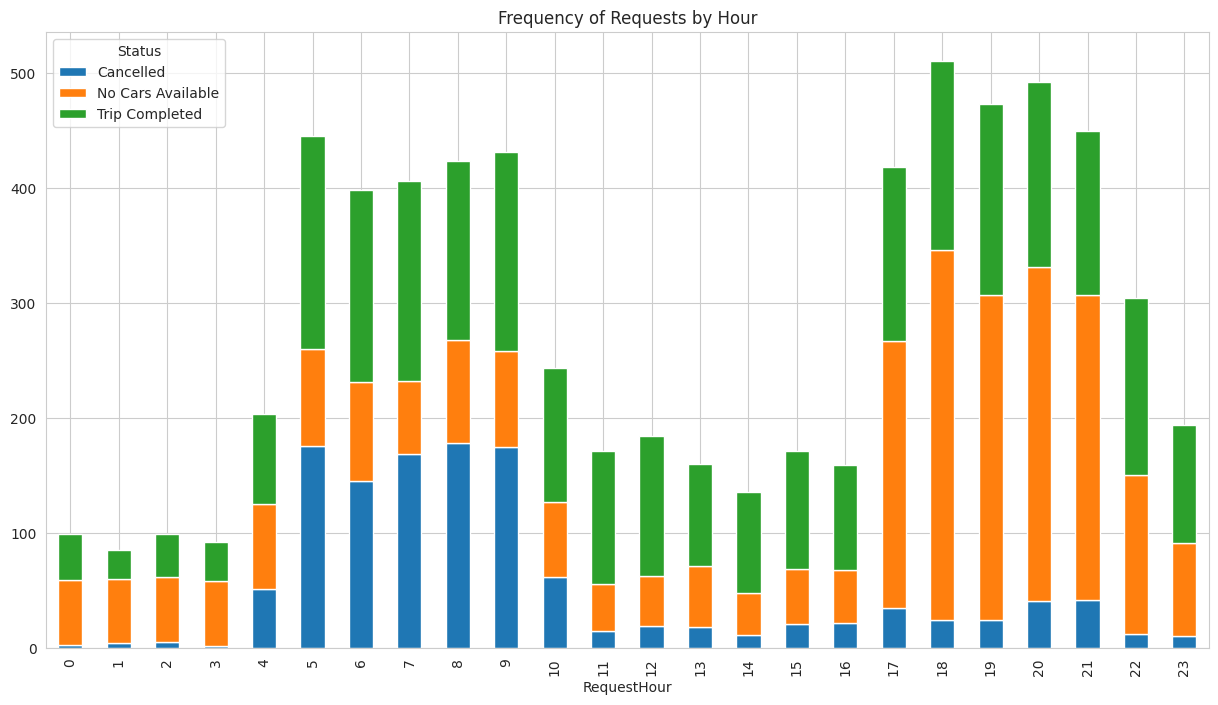

In [ ]:
# Frequency of Requests by Hour -

df.groupby(['RequestHour', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title("Frequency of Requests by Hour")

Text(0, 0.5, '')

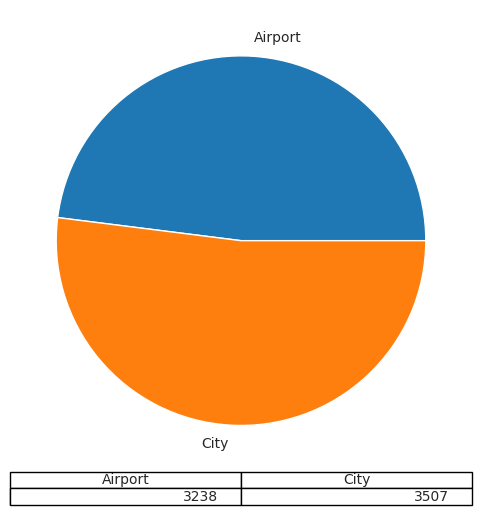

In [ ]:
# Types of Requests (city-airport or airport-city) -

df.groupby(['Pickup point']).size().plot(kind='pie', stacked=True, figsize=(6,6), table=True)
plt.ylabel("")

Text(0, 0.5, '')

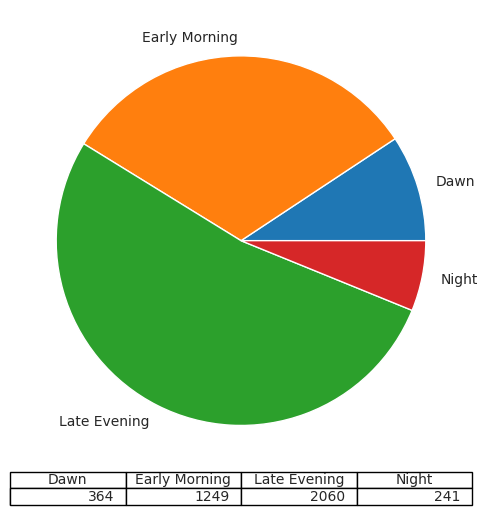

In [ ]:
# Distribution of Time Slots -

df[(df['CabAvailability'] == 'Not Available')].groupby(['TimeSlot']).size().plot(kind='pie', stacked=True, figsize=(6,6), table=True)
plt.ylabel("")

**Q. Plot the Demand-Supply Gap from Airport to City.**

Text(0.5, 1.0, 'Demand-Supply Gap from Airport to City')

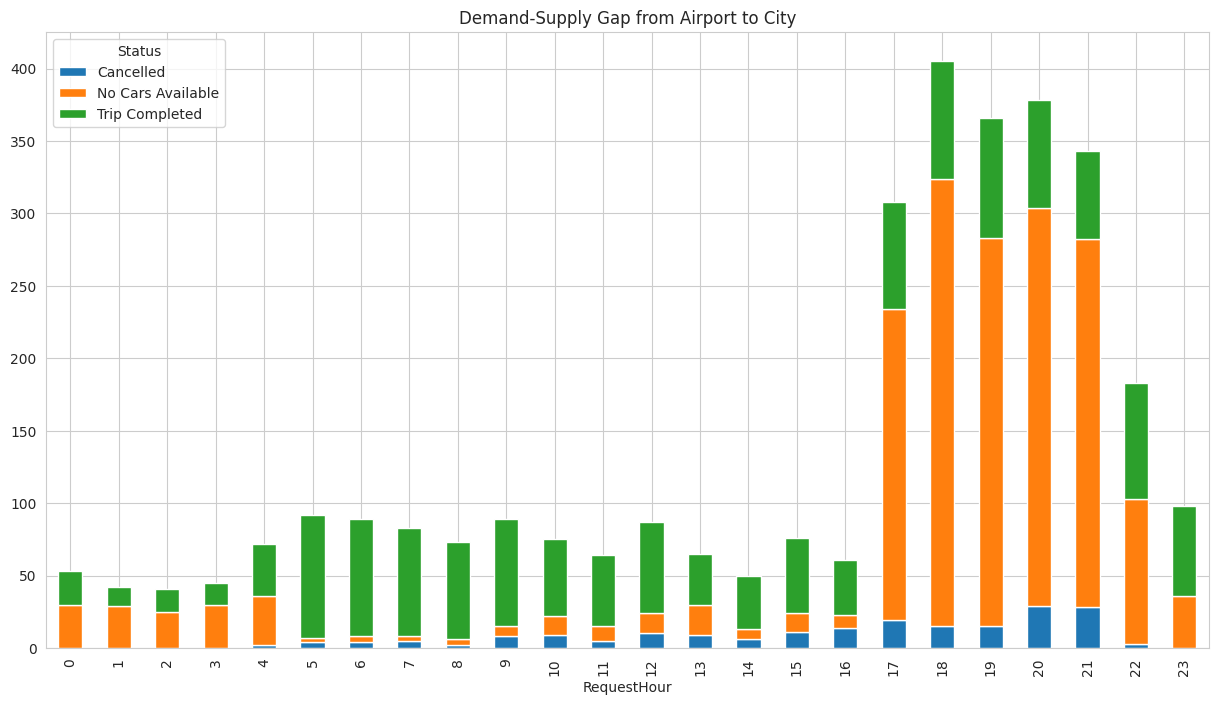

In [ ]:
# Demand-Supply Gap from Airport to City -

df[(df['Pickup point'] == 'Airport')].groupby(['RequestHour', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from Airport to City')

Text(0.5, 1.0, 'Demand-Supply Gap from City to Airport')

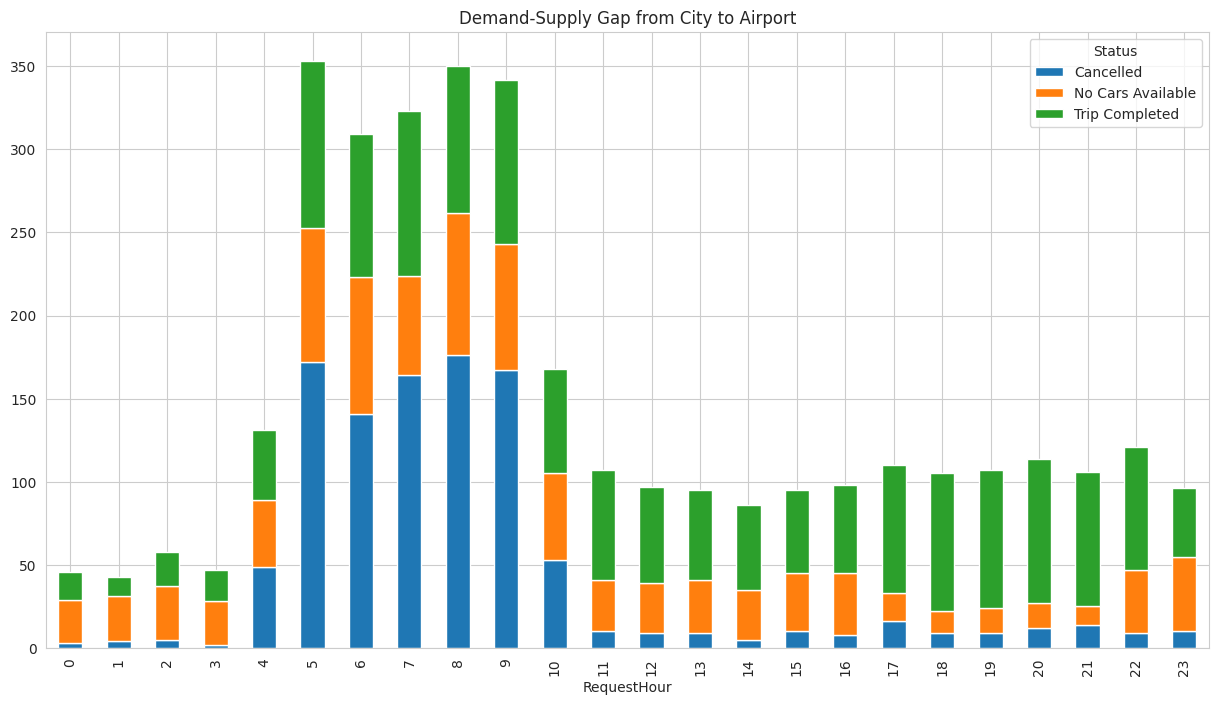

In [ ]:
# Demand-Supply Gap from City to Airport -

df[(df['Pickup point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from City to Airport')

Text(0.5, 1.0, 'Time slots where highest gap exists')

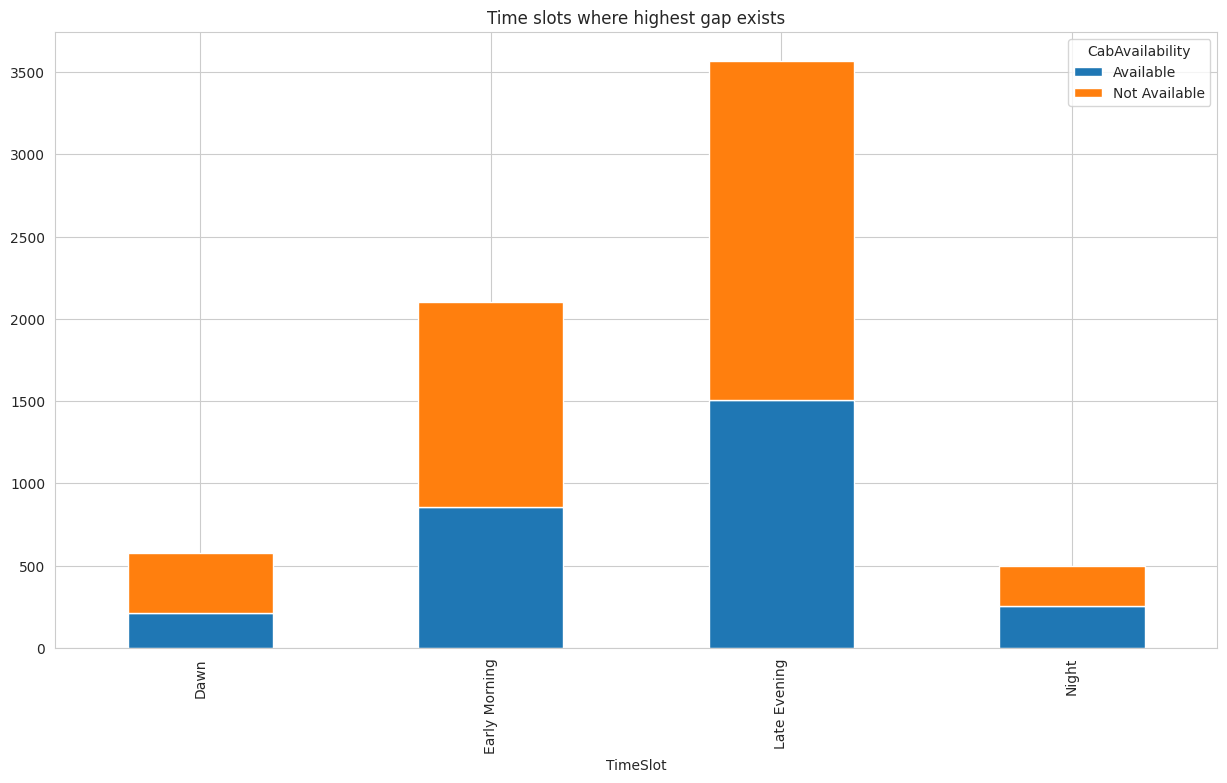

In [ ]:
# Time slots where highest gap exists -

df.groupby(['TimeSlot','CabAvailability']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title('Time slots where highest gap exists')

Text(0, 0.5, '')

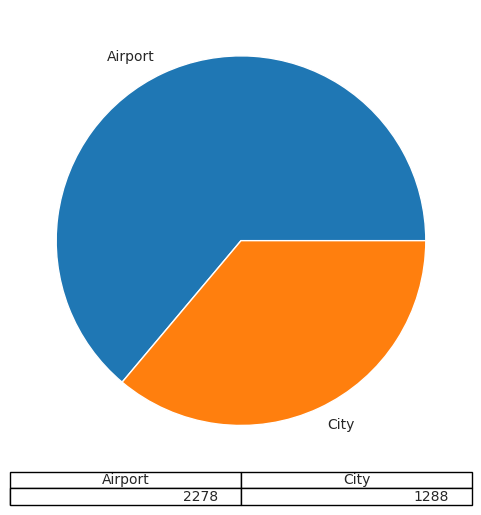

In [ ]:
#  Types of Requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots -

df[df["TimeSlot"]=="Late Evening"].groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6), table=True)
plt.ylabel("")